In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/hp/Downloads/IRIS Flower.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.isnull().sum()/len(data)*100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

In [10]:
data["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

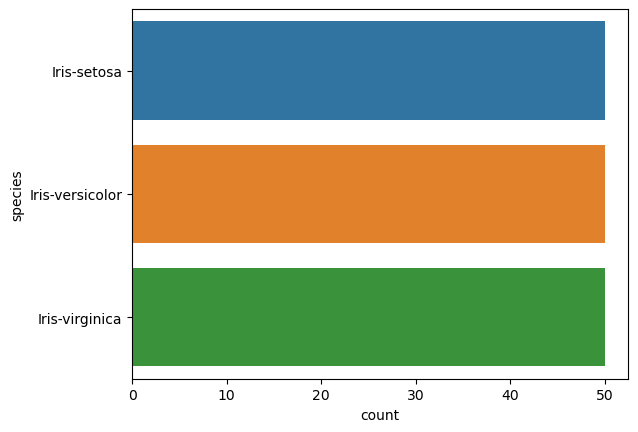

In [11]:
sns.countplot(y = "species",data = data)
plt.show()

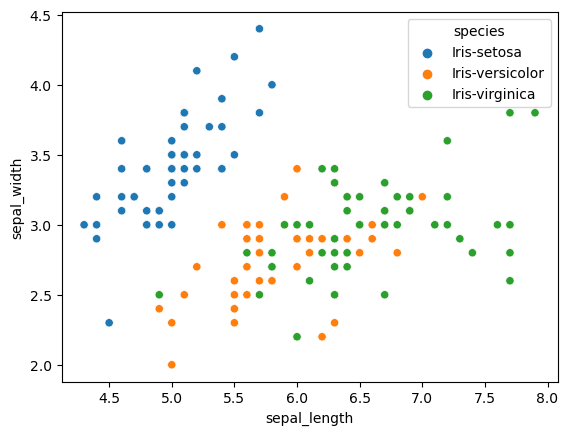

In [12]:
sns.scatterplot(data = data, x = "sepal_length", y = "sepal_width",hue = "species")
plt.show()

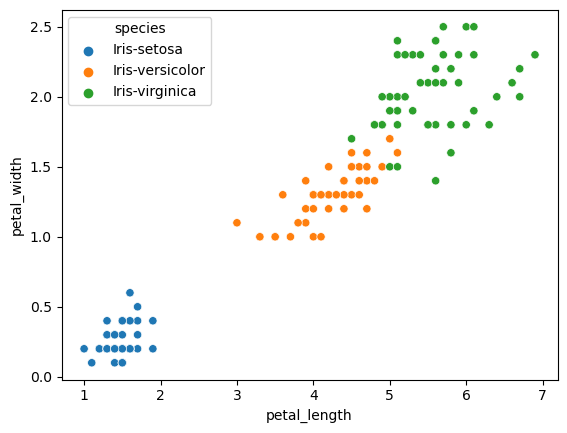

In [13]:
sns.scatterplot(data = data, x = "petal_length", y = "petal_width",hue = "species")
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


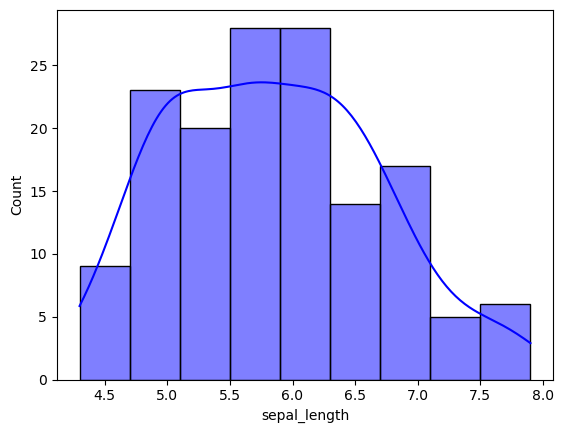

In [14]:
sns.histplot(data = data, x = "sepal_length", color = "blue",kde = True)
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


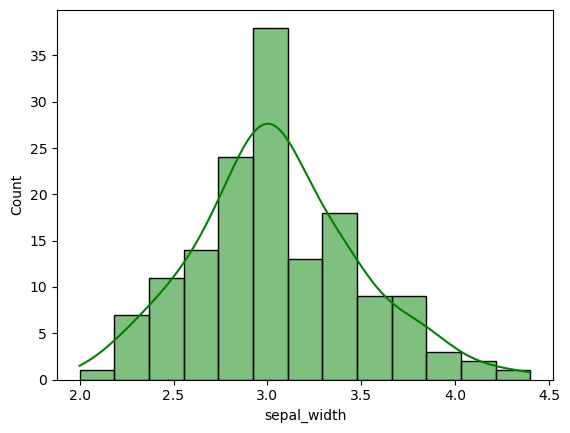

In [15]:
sns.histplot(data = data, x = "sepal_width", color = "green",kde = True)
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


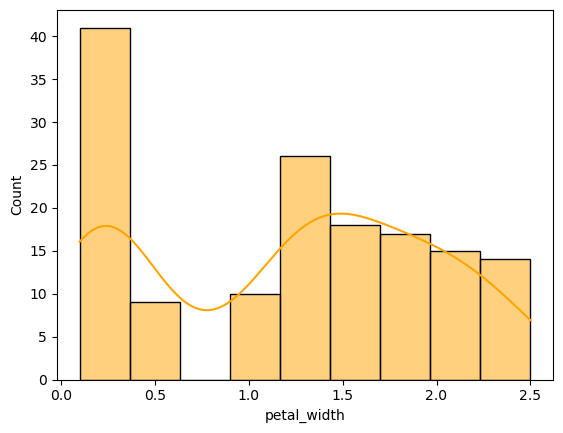

In [16]:
sns.histplot(data = data, x = "petal_width", color = "orange", kde = True)
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


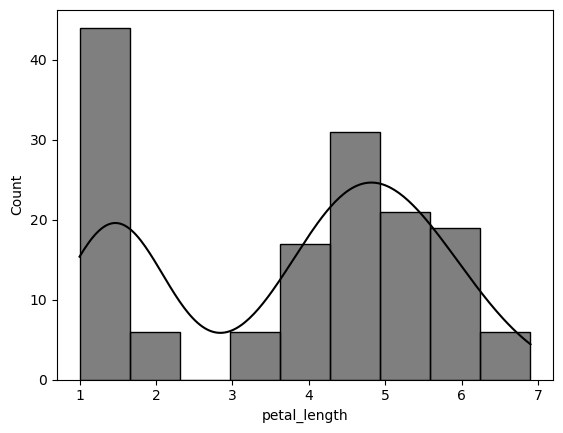

In [17]:
sns.histplot(data = data, x = "petal_length", color = "black", kde = True)
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

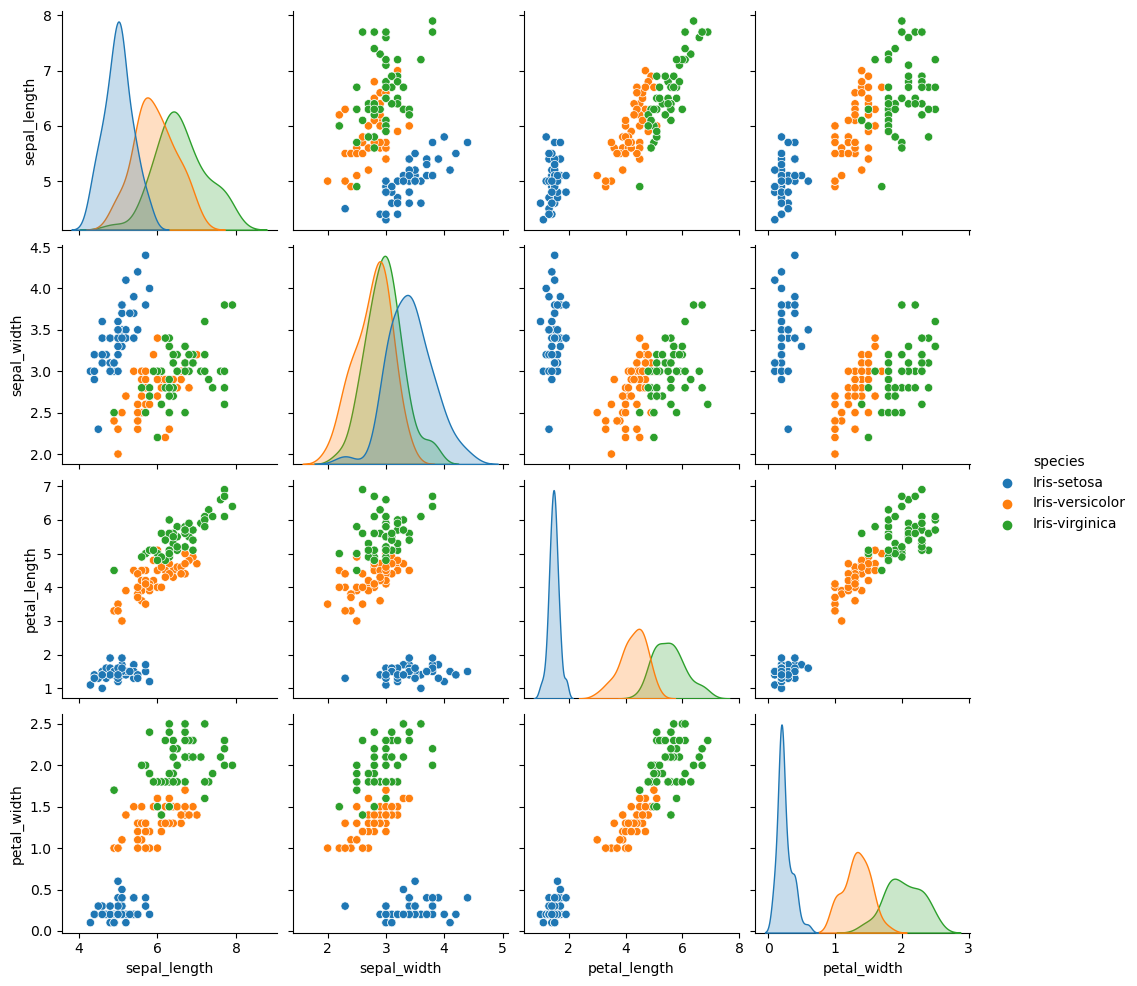

In [18]:
sns.pairplot(data, hue = "species")

In [20]:
data["species"]=data["species"].replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})
label_name=["Iris-setosa","Iris-versicolor","Iris-virginica"]

C:\Users\hp\AppData\Local\Temp\ipykernel_18640\562635876.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["species"]=data["species"].replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})


In [21]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [23]:
X=data.drop(columns="species",axis=1)
y=data["species"]

In [24]:
y.shape

(150,)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

logistic_model = LogisticRegression()
svm_model = SVC(probability=True)
random_forest_model = RandomForestClassifier()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

In [27]:
logistic_model.fit(X_train,y_train)
pred1=logistic_model.predict(X_test)

print(f"Accuracy Score : {accuracy_score(y_test,pred1)}")

Accuracy Score : 1.0


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


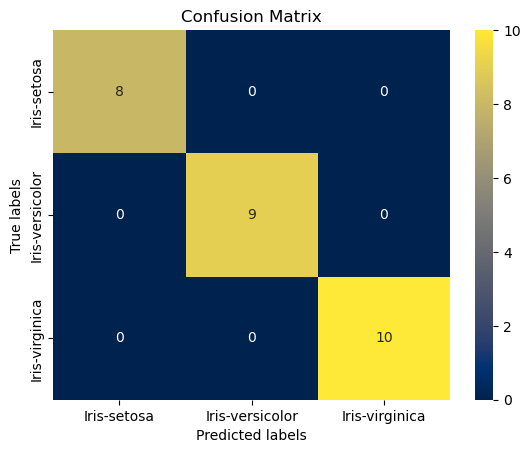

In [28]:
cf=confusion_matrix(y_test,pred1)
sns.heatmap(cf,annot=True,fmt="d",cmap="cividis",xticklabels=label_name,yticklabels=label_name)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [29]:
print(classification_report(y_test,pred1,target_names=label_name))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        27
      macro avg       1.00      1.00      1.00        27
   weighted avg       1.00      1.00      1.00        27



In [30]:
x=logistic_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test,x, multi_class='ovr')

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 1.0


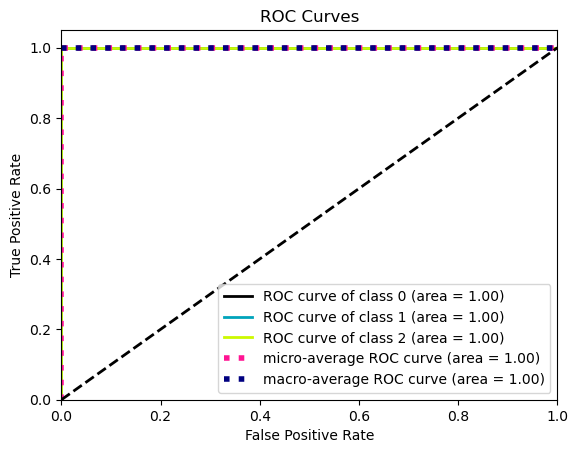

In [31]:
import scikitplot as skplt
y_probas = logistic_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

In [32]:
svm_model.fit(X_train,y_train)
pred2=svm_model.predict(X_test)
print(f"Accuracy Score : {accuracy_score(y_test,pred2)}")

Accuracy Score : 1.0


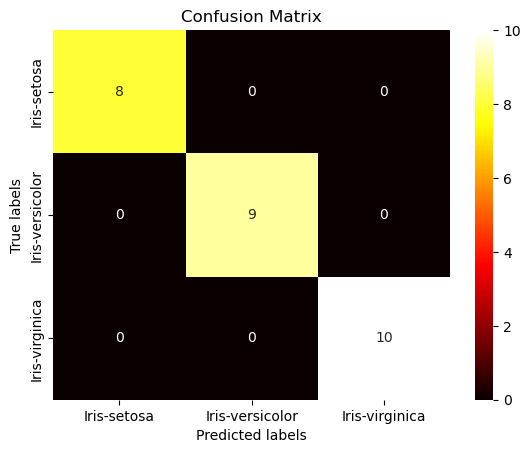

In [33]:
cf=confusion_matrix(y_test,pred2)
sns.heatmap(cf,annot=True,fmt="d",cmap="hot",xticklabels=label_name,yticklabels=label_name)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [34]:
print(classification_report(y_test,pred2,target_names=label_name))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        27
      macro avg       1.00      1.00      1.00        27
   weighted avg       1.00      1.00      1.00        27



In [35]:
y=logistic_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test,y, multi_class='ovr')

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 1.0


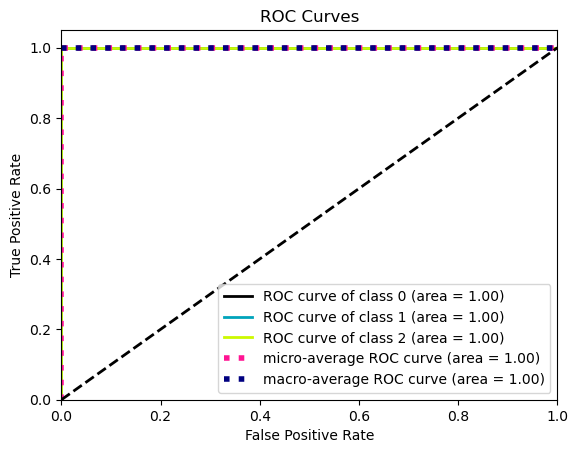

In [36]:
y_probas = svm_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

In [37]:
train_data=data.drop(columns="species",axis=1)
label_data=data["species"]

In [38]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(svm_model, train_data,label_data, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [1.         1.         0.93333333 0.93333333 0.96666667]
Mean Accuracy: 0.9666666666666668


In [39]:
random_forest_model.fit(X_train,y_train)
pred3=random_forest_model.predict(X_test)
print(f"Accuracy Score : {accuracy_score(y_test,pred3)}")

Accuracy Score : 1.0


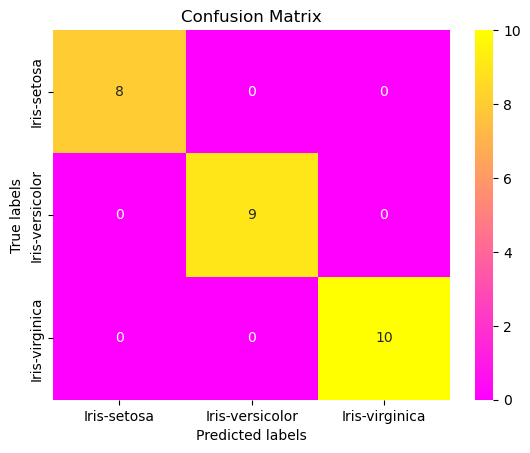

In [40]:
cf=confusion_matrix(y_test,pred2)
sns.heatmap(cf,annot=True,fmt="d",cmap="spring",xticklabels=label_name,yticklabels=label_name)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [41]:
print(classification_report(y_test,pred3,target_names=label_name))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        27
      macro avg       1.00      1.00      1.00        27
   weighted avg       1.00      1.00      1.00        27



In [42]:
z=logistic_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test,z, multi_class='ovr')

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 1.0


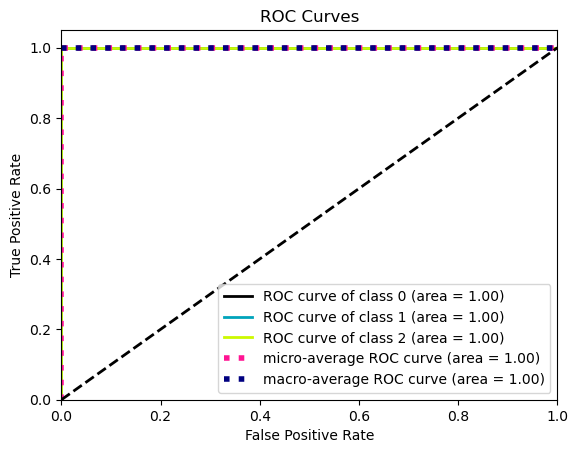

In [43]:
y_probas = random_forest_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

In [44]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(random_forest_model, train_data,label_data, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [1.         0.96666667 0.93333333 0.93333333 0.93333333]
Mean Accuracy: 0.9533333333333335


In [45]:
import numpy as np
test=np.array([[5.1,3.5,1.4,0.3]])
random_forest_model.predict(test)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)